# WEEK 1


In [ ]:
#1.1
import numpy as np


In [ ]:
#Input data for the AND Gate
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,0,0,1])

In [ ]:
#Different Intializations
#1.Zero Intialization
'''weights = np.zeros(2)
bias = 0'''

#2.Random Initialization
weights = np.random.uniform(-0.01, 0.01, 2)
bias = np.random.uniform(-0.01, 0.01)

#3.Advanced(Xavier) Initialization
'''limit = np.sqrt(1 / X.shape[1])
weights = np.random.uniform(-limit, limit, 2)
bias = 0'''


'limit = np.sqrt(1 / X.shape[1])\nweights = np.random.uniform(-limit, limit, 2)\nbias = 0'

In [ ]:
learning_rate = 0.1
epochs = 10

print("Initial weights", weights)
print("Initial bias", bias)

Initial weights [-0.00031576  0.0029731 ]
Initial bias -0.004458789682353386


In [ ]:
#training loop
for epoch in range(epochs):
    print(f"\nEpoch {epoch+1}")
    for i in range(len(X)):
        # Weighted sum
        z = np.dot(X[i], weights) + bias
        # Step activation function
        pred = 1 if z >= 0 else 0
        # Calculate error
        error = y[i] - pred
        # Update weights and bias
        weights += learning_rate * error * X[i]
        bias += learning_rate * error
        print(f" Input: {X[i]}, Pred: {pred}, Error: {error}")
    print(" Updated weights:", weights)
    print(" Updated bias:", bias)


Epoch 1
 Input: [0 0], Pred: 0, Error: 0
 Input: [0 1], Pred: 0, Error: 0
 Input: [1 0], Pred: 0, Error: 0
 Input: [1 1], Pred: 0, Error: 1
 Updated weights: [0.09968424 0.1029731 ]
 Updated bias: 0.09554121031764662

Epoch 2
 Input: [0 0], Pred: 1, Error: -1
 Input: [0 1], Pred: 1, Error: -1
 Input: [1 0], Pred: 0, Error: 0
 Input: [1 1], Pred: 0, Error: 1
 Updated weights: [0.19968424 0.1029731 ]
 Updated bias: -0.004458789682353387

Epoch 3
 Input: [0 0], Pred: 0, Error: 0
 Input: [0 1], Pred: 1, Error: -1
 Input: [1 0], Pred: 1, Error: -1
 Input: [1 1], Pred: 0, Error: 1
 Updated weights: [0.19968424 0.1029731 ]
 Updated bias: -0.10445878968235339

Epoch 4
 Input: [0 0], Pred: 0, Error: 0
 Input: [0 1], Pred: 0, Error: 0
 Input: [1 0], Pred: 1, Error: -1
 Input: [1 1], Pred: 0, Error: 1
 Updated weights: [0.19968424 0.2029731 ]
 Updated bias: -0.10445878968235339

Epoch 5
 Input: [0 0], Pred: 0, Error: 0
 Input: [0 1], Pred: 1, Error: -1
 Input: [1 0], Pred: 0, Error: 0
 Input: [1

In [ ]:
# Test Predictions
print("\nFinal Predictions:")
for i in range(len(X)):
    z = np.dot(X[i], weights) + bias
    pred = 1 if z >= 0 else 0
    print(f"{X[i]} → {pred}")


Final Predictions:
[0 0] → 0
[0 1] → 0
[1 0] → 0
[1 1] → 1


# Week 2

In [ ]:
#2.1
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_iris()
X = data.data      # Input features
y = data.target    # Output labels

# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1
)

# -------------------------------
# MLP Model 1: Hidden layers (10, 5)
# -------------------------------
mlp1 = MLPClassifier(
    hidden_layer_sizes=(10, 5),
    activation='relu',
    solver='adam',
    random_state=1,
    max_iter=1000
)

mlp1.fit(X_train, y_train)
y_pred1 = mlp1.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred1)

print("Accuracy with hidden layers (10, 5):", accuracy1)

Accuracy with hidden layers (10, 5): 0.9111111111111111


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
#2.2
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1
)

# --------------------------------------
# Model 1: Backpropagation using ADAM
# --------------------------------------
start_time = time.time()

mlp_adam = MLPClassifier(
    hidden_layer_sizes=(10, 5),
    learning_rate_init=0.01,
    max_iter=300,
    solver='adam',
    verbose=True,
    random_state=1
)

mlp_adam.fit(X_train, y_train)

adam_time = time.time() - start_time

y_pred_adam = mlp_adam.predict(X_test)
adam_accuracy = accuracy_score(y_test, y_pred_adam)

print("\nADAM Solver Accuracy:", adam_accuracy)
print("ADAM Training Time:", adam_time, "seconds")

Iteration 1, loss = 2.78442184
Iteration 2, loss = 2.52125061
Iteration 3, loss = 2.27634318
Iteration 4, loss = 2.05152806
Iteration 5, loss = 1.85249467
Iteration 6, loss = 1.68191832
Iteration 7, loss = 1.53591315
Iteration 8, loss = 1.41069363
Iteration 9, loss = 1.30437080
Iteration 10, loss = 1.21477640
Iteration 11, loss = 1.13749499
Iteration 12, loss = 1.07608177
Iteration 13, loss = 1.04271048
Iteration 14, loss = 1.02135048
Iteration 15, loss = 1.00400290
Iteration 16, loss = 0.98839832
Iteration 17, loss = 0.97419954
Iteration 18, loss = 0.96124620
Iteration 19, loss = 0.94935135
Iteration 20, loss = 0.93772931
Iteration 21, loss = 0.92623359
Iteration 22, loss = 0.91454040
Iteration 23, loss = 0.90272342
Iteration 24, loss = 0.89097135
Iteration 25, loss = 0.87944038
Iteration 26, loss = 0.86799448
Iteration 27, loss = 0.85642398
Iteration 28, loss = 0.84457035
Iteration 29, loss = 0.83234885
Iteration 30, loss = 0.81975068
Iteration 31, loss = 0.80733518
Iteration 32, los

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
#2.3
# Import required libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load Iris dataset
iris = load_iris()
X = iris.data        # Features
y = iris.target     # Labels

print("Target Names:", iris.target_names)

# -------------------------------
# Preprocessing using StandardScaler
# -------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("\nUsing StandardScaler")
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

# -------------------------------
# Try: Preprocessing using MinMaxScaler
# -------------------------------
minmax_scaler = MinMaxScaler()
X_minmax = minmax_scaler.fit_transform(X)

X_train_mm, X_test_mm, y_train_mm, y_test_mm = train_test_split(
    X_minmax, y, test_size=0.2, random_state=42
)

print("\nUsing MinMaxScaler")
print("Training data shape:", X_train_mm.shape)
print("Testing data shape:", X_test_mm.shape)


Target Names: ['setosa' 'versicolor' 'virginica']

Using StandardScaler
Training data shape: (120, 4)
Testing data shape: (30, 4)

Using MinMaxScaler
Training data shape: (120, 4)
Testing data shape: (30, 4)


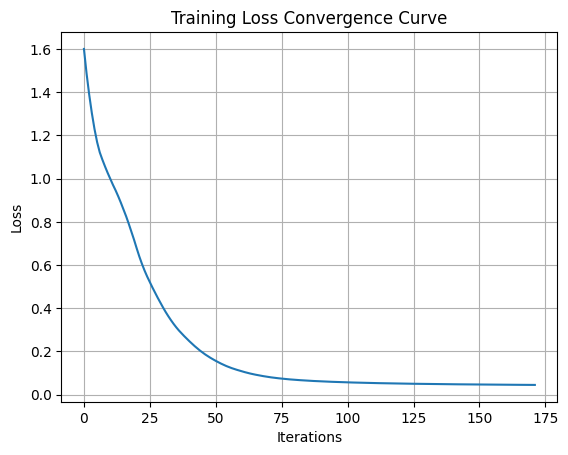

In [ ]:
#2.4
# Import required libraries
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load and preprocess dataset
iris = load_iris()
X, y = iris.data, iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# -----------------------------------
# Train MLP with learning_rate = 0.01
# -----------------------------------
mlp = MLPClassifier(
    hidden_layer_sizes=(10, 5),
    learning_rate_init=0.01,
    max_iter=300,
    solver='adam',
    random_state=1
)

mlp.fit(X_train, y_train)

# -----------------------------------
# Plot Training Loss Curve
# -----------------------------------
plt.plot(mlp.loss_curve_)
plt.title("Training Loss Convergence Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


# Week 3


In [ ]:
#3.1
# Import necessary library
import numpy as np

# -------------------------------
# Input data (AND gate)
# -------------------------------
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([0, 0, 0, 1])  # AND gate output

# -------------------------------
# Initialize weights and bias
# -------------------------------
np.random.seed(42)
weights = np.random.randn(2) * 0.01
bias = np.random.randn() * 0.01

# Parameters
learning_rate = 0.1
epochs = 10

# -------------------------------
# Training loop using SGD
# -------------------------------
for epoch in range(epochs):
    for i in range(len(X)):
        # Forward pass
        z = np.dot(X[i], weights) + bias
        pred = 1 if z >= 0 else 0

        # Error calculation
        error = y[i] - pred

        # Parameter update (SGD)
        weights += learning_rate * error * X[i]
        bias += learning_rate * error

# -------------------------------
# Display trained parameters
# -------------------------------
print("Trained Weights:", weights)
print("Trained Bias:", bias)

# -------------------------------
# Predictions after training
# -------------------------------
print("\nPredictions after training:")
for i in range(len(X)):
    z = np.dot(X[i], weights) + bias
    pred = 1 if z >= 0 else 0
    print(f"Input: {X[i]} -> Predicted Output: {pred}")


Trained Weights: [0.20496714 0.09861736]
Trained Bias: -0.29352311461899305

Predictions after training:
Input: [0 0] -> Predicted Output: 0
Input: [0 1] -> Predicted Output: 0
Input: [1 0] -> Predicted Output: 0
Input: [1 1] -> Predicted Output: 1


In [ ]:
#3.2
# Importing the library
import numpy as np

# Input data (AND gate)
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([0, 0, 0, 1])

# Function to train perceptron with given learning rate and batch size
def train_perceptron(learning_rate, batch_size):
    np.random.seed(42)
    weights = np.random.randn(2) * 0.01
    bias = np.random.randn() * 0.01
    epochs = 10

    for epoch in range(epochs):
        for i in range(0, len(X), batch_size):
            X_batch = X[i:i + batch_size]
            y_batch = y[i:i + batch_size]

            weight_update = np.zeros_like(weights)
            bias_update = 0

            for j in range(len(X_batch)):
                z = np.dot(X_batch[j], weights) + bias
                pred = 1 if z >= 0 else 0
                error = y_batch[j] - pred

                weight_update += learning_rate * error * X_batch[j]
                bias_update += learning_rate * error

            # Apply average batch update
            weights += weight_update / batch_size
            bias += bias_update / batch_size

    # Output results
    print(f"\nLearning Rate: {learning_rate}, Batch Size: {batch_size}")
    print("Trained Weights:", weights)
    print("Trained Bias:", bias)

    for i in range(len(X)):
        z = np.dot(X[i], weights) + bias
        pred = 1 if z >= 0 else 0
        print(f"Input: {X[i]} -> Predicted: {pred}")

# Try different combinations
train_perceptron(0.1, 1)   # SGD
train_perceptron(0.1, 2)   # Mini-batch
train_perceptron(0.5, 1)   # High learning rate SGD
train_perceptron(0.01, 4)  # Small learning rate, full batch



Learning Rate: 0.1, Batch Size: 1
Trained Weights: [0.20496714 0.09861736]
Trained Bias: -0.29352311461899305
Input: [0 0] -> Predicted: 0
Input: [0 1] -> Predicted: 0
Input: [1 0] -> Predicted: 0
Input: [1 1] -> Predicted: 1

Learning Rate: 0.1, Batch Size: 2
Trained Weights: [0.10496714 0.04861736]
Trained Bias: -0.1435231146189931
Input: [0 0] -> Predicted: 0
Input: [0 1] -> Predicted: 0
Input: [1 0] -> Predicted: 0
Input: [1 1] -> Predicted: 1

Learning Rate: 0.5, Batch Size: 1
Trained Weights: [1.00496714 0.49861736]
Trained Bias: -1.4935231146189931
Input: [0 0] -> Predicted: 0
Input: [0 1] -> Predicted: 0
Input: [1 0] -> Predicted: 0
Input: [1 1] -> Predicted: 1

Learning Rate: 0.01, Batch Size: 4
Trained Weights: [0.00246714 0.00111736]
Trained Bias: -0.003523114618993075
Input: [0 0] -> Predicted: 0
Input: [0 1] -> Predicted: 0
Input: [1 0] -> Predicted: 0
Input: [1 1] -> Predicted: 1


In [ ]:
#3.3
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ----------------------------------
# SGD (batch size = 1)
# ----------------------------------
sgd_clf = SGDClassifier(
    loss='log_loss',
    learning_rate='constant',
    eta0=0.01,
    max_iter=1000,
    random_state=42
)

sgd_clf.fit(X_train, y_train)
sgd_pred = sgd_clf.predict(X_test)
sgd_accuracy = accuracy_score(y_test, sgd_pred)

print("SGD Accuracy:", sgd_accuracy)
# ----------------------------------
# Mini-Batch Gradient Descent
# ----------------------------------
mini_batch_clf = SGDClassifier(
    loss='log_loss',
    learning_rate='constant',
    eta0=0.01,
    max_iter=1000,
    average=True,   # enables mini-batch style averaging
    random_state=42
)

mini_batch_clf.fit(X_train, y_train)
mini_pred = mini_batch_clf.predict(X_test)
mini_accuracy = accuracy_score(y_test, mini_pred)

print("Mini-Batch Accuracy:", mini_accuracy)

SGD Accuracy: 0.9666666666666667
Mini-Batch Accuracy: 0.9666666666666667


# WEEK 4

In [ ]:
#4.1 implementation of networks using ReLU, sigmoid and Tanh activation functions.
# Import numpy
import numpy as np

# Input data (AND gate)
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([0, 0, 0, 1])

# -------------------------------
# Activation functions
# -------------------------------
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

# -------------------------------
# Train perceptron-like model
# -------------------------------
def train_with_activation(activation_fn, name):
    np.random.seed(42)
    weights = np.random.randn(2) * 0.01
    bias = np.random.randn() * 0.01
    learning_rate = 0.1
    epochs = 10

    for epoch in range(epochs):
        for i in range(len(X)):
            z = np.dot(X[i], weights) + bias
            a = activation_fn(z)

            # Convert activation to binary prediction
            pred = 1 if a >= 0.5 else 0
            error = y[i] - pred

            # Update weights and bias
            weights += learning_rate * error * X[i]
            bias += learning_rate * error

    print(f"\nActivation Function: {name}")
    print("Trained Weights:", weights)
    print("Trained Bias:", bias)

    for i in range(len(X)):
        z = np.dot(X[i], weights) + bias
        a = activation_fn(z)
        pred = 1 if a >= 0.5 else 0
        print(f"Input: {X[i]} -> Prediction: {pred}")

# -------------------------------
# Try different activations
# -------------------------------
train_with_activation(relu, "ReLU")
train_with_activation(sigmoid, "Sigmoid")
train_with_activation(tanh, "Tanh")


In [ ]:
#4.2 Compare performance on simple classification problem
import numpy as np

# Binary classification dataset (AND gate)
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([0, 0, 0, 1])

# -------------------------------
# Activation functions
# -------------------------------
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

# -------------------------------
# Evaluate model performance
# -------------------------------
def evaluate(activation_fn, name):
    np.random.seed(42)
    weights = np.random.randn(2) * 0.01
    bias = np.random.randn() * 0.01
    learning_rate = 0.1
    epochs = 10

    # Training loop
    for epoch in range(epochs):
        for i in range(len(X)):
            z = np.dot(X[i], weights) + bias
            a = activation_fn(z)
            pred = 1 if a >= 0.5 else 0
            error = y[i] - pred
            weights += learning_rate * error * X[i]
            bias += learning_rate * error

    # Accuracy calculation
    correct = 0
    print(f"\nActivation Function: {name}")
    for i in range(len(X)):
        z = np.dot(X[i], weights) + bias
        a = activation_fn(z)
        pred = 1 if a >= 0.5 else 0
        print(f"Input: {X[i]} -> Prediction: {pred}")
        if pred == y[i]:
            correct += 1

    accuracy = correct / len(X)
    print(f"Accuracy: {correct}/{len(X)} = {accuracy}")

# -------------------------------
# Compare activations
# -------------------------------
evaluate(relu, "ReLU")
evaluate(sigmoid, "Sigmoid")
evaluate(tanh, "Tanh")



Activation Function: ReLU
Input: [0 0] -> Prediction: 0
Input: [0 1] -> Prediction: 0
Input: [1 0] -> Prediction: 0
Input: [1 1] -> Prediction: 1
Accuracy: 4/4 = 1.0

Activation Function: Sigmoid
Input: [0 0] -> Prediction: 0
Input: [0 1] -> Prediction: 0
Input: [1 0] -> Prediction: 0
Input: [1 1] -> Prediction: 1
Accuracy: 4/4 = 1.0

Activation Function: Tanh
Input: [0 0] -> Prediction: 0
Input: [0 1] -> Prediction: 0
Input: [1 0] -> Prediction: 0
Input: [1 1] -> Prediction: 1
Accuracy: 4/4 = 1.0


In [ ]:
#4.3 Investigate the vanishing Gradient Problem
import numpy as np

X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([0, 0, 0, 1])

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def d_sigmoid(x):
    s = sigmoid(x)
    return s * (1 - s)

def d_tanh(x):
    return 1 - np.tanh(x)**2

def d_relu(x):
    return 1 if x > 0 else 0

def investigate_gradients(activation_fn, derivative_fn, name):
    np.random.seed(42)
    weights = np.random.randn(2) * 0.01
    bias = np.random.randn() * 0.01
    learning_rate = 0.1
    epochs = 2

    print(f"\nActivation Function: {name}")

    for epoch in range(epochs):
        for i in range(len(X)):
            z = np.dot(X[i], weights) + bias
            a = activation_fn(z)
            pred = 1 if a >= 0.5 else 0
            error = y[i] - pred

            grad = derivative_fn(z)
            print(f"Epoch {epoch}, Input {X[i]}, Gradient: {grad:.6f}")

            weights += learning_rate * error * X[i] * grad
            bias += learning_rate * error * grad

investigate_gradients(sigmoid, d_sigmoid, "Sigmoid")
investigate_gradients(tanh, d_tanh, "Tanh")
investigate_gradients(relu, d_relu, "ReLU")



Activation Function: Sigmoid
Epoch 0, Input [0 0], Gradient: 0.249997
Epoch 0, Input [0 1], Gradient: 0.249975
Epoch 0, Input [1 0], Gradient: 0.249989
Epoch 0, Input [1 1], Gradient: 0.249986
Epoch 1, Input [0 0], Gradient: 0.249997
Epoch 1, Input [0 1], Gradient: 0.249998
Epoch 1, Input [1 0], Gradient: 0.249989
Epoch 1, Input [1 1], Gradient: 0.249986

Activation Function: Tanh
Epoch 0, Input [0 0], Gradient: 0.999958
Epoch 0, Input [0 1], Gradient: 0.999974
Epoch 0, Input [1 0], Gradient: 0.999869
Epoch 0, Input [1 1], Gradient: 0.999899
Epoch 1, Input [0 0], Gradient: 0.988750
Epoch 1, Input [0 1], Gradient: 0.959096
Epoch 1, Input [1 0], Gradient: 0.956599
Epoch 1, Input [1 1], Gradient: 0.909721

Activation Function: ReLU
Epoch 0, Input [0 0], Gradient: 1.000000
Epoch 0, Input [0 1], Gradient: 1.000000
Epoch 0, Input [1 0], Gradient: 1.000000
Epoch 0, Input [1 1], Gradient: 1.000000
Epoch 1, Input [0 0], Gradient: 1.000000
Epoch 1, Input [0 1], Gradient: 1.000000
Epoch 1, Input

# WEEK 5


In [1]:
# 5.1
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
from sklearn.model_selection import train_test_split
# Generate square image
def generate_square():
    img = np.zeros((32, 32))
    img[8:24, 8:24] = 1
    return img

# Generate circle image
def generate_circle():
    img = np.zeros((32, 32))
    rr, cc = np.ogrid[:32, :32]
    mask = (rr - 16)**2 + (cc - 16)**2 <= 8**2
    img[mask] = 1
    return img

# Create dataset
X = []
y = []

for i in range(200):
    X.append(generate_square())
    y.append(0)
    X.append(generate_circle())
    y.append(1)

X = np.array(X).reshape(-1, 32, 32, 1)
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
model = models.Sequential([
    layers.Conv2D(16, (3,3), activation='relu', input_shape=(32,32,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()
model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=16,
    validation_split=0.1
)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 78,722 (307.51 KB)

 Trainable params: 78,722 (307.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 1.0000 - loss: 0.5022 - val_accuracy: 1.0000 - val_loss: 0.1003
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0536 - val_accuracy: 1.0000 - val_loss: 0.0032
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 1.0000 - val_loss: 6.0935e-04
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 5.1087e-04 - val_accuracy: 1.0000 - val_loss: 3.3743e-04
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 3.0148e-04 - val_accuracy: 1.0000 - val_loss: 2.4990e-04
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 2.2982e-04 - val_accuracy: 1.0000 - val_loss: 1.9672e-04
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 1.8247e-04 - val_accuracy: 1.0000 - val_loss: 1.5919e-04
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - los

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training data shape: (60000, 28, 28, 1)
Testing data shape: (10000, 28, 28, 1)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 74s 43ms/step - accuracy: 0.8955 - loss: 0.3490 - val_accuracy: 0.9862 - val_loss: 0.0487
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 49s 29ms/step - accuracy: 0.9857 - loss: 0.0509 - val_accuracy: 0.9892 - val_loss: 0.0376
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 51s 30ms/step - accuracy: 0.9891 - loss: 0.0344 - val_accuracy: 0.9885 - val_loss: 0.0433
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.9911 - loss: 0.0246 - val_accuracy: 0.9890 - val_loss: 0.0361
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 49s 29ms/step - accuracy: 0.9949 - loss: 0.0164 - val_accuracy: 0.9910 - val_loss: 0.0374
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9853 - loss: 0.0405

Test accuracy: 0.9896000027656555


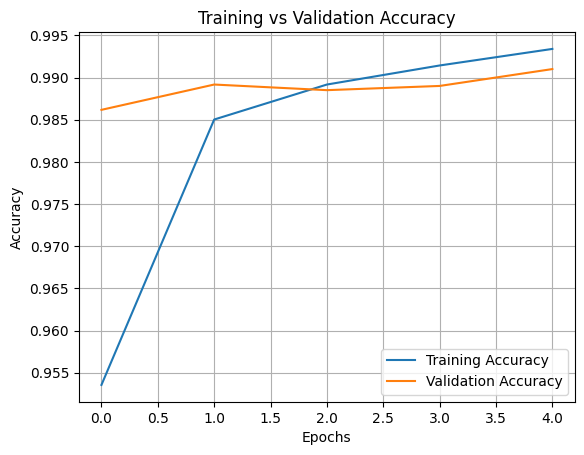

In [2]:
# =========================================
# 5.2 Train a CNN on MNIST Dataset
# =========================================

# Import required libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# -----------------------------------------
# Load MNIST dataset
# -----------------------------------------
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize and reshape data
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

# -----------------------------------------
# Build CNN model
# -----------------------------------------
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# -----------------------------------------
# Compile the model
# -----------------------------------------
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# -----------------------------------------
# Train the model
# -----------------------------------------
history = model.fit(
    X_train,
    y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.1
)

# -----------------------------------------
# Evaluate on test data
# -----------------------------------------
test_loss, test_acc = model.evaluate(X_test, y_test)
print("\nTest accuracy:", test_acc)

# -----------------------------------------
# Plot training & validation accuracy
# -----------------------------------------
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()


Training samples: (60000, 28, 28, 1)
Testing samples: (10000, 28, 28, 1)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)


Training model...
Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 28ms/step - accuracy: 0.9013 - loss: 0.3192
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.9855 - loss: 0.0490
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.9904 - loss: 0.0301
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9868 - loss: 0.0380

Test accuracy: 0.9901999831199646


Visualizing filters from first Conv layer...


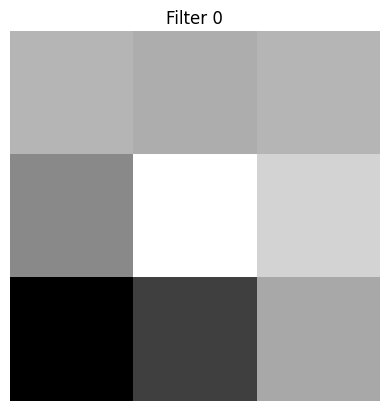

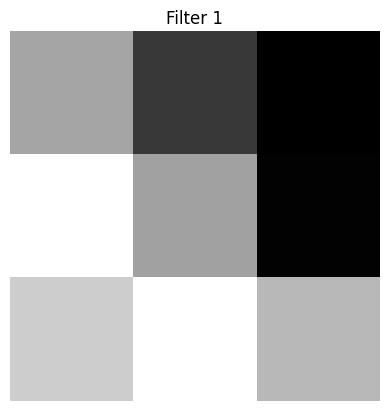

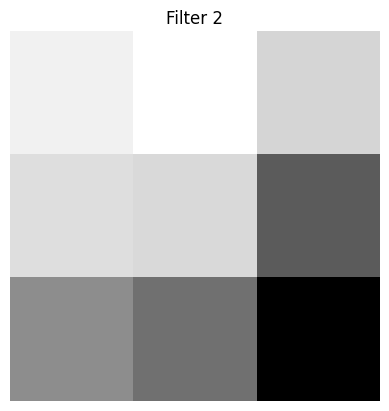

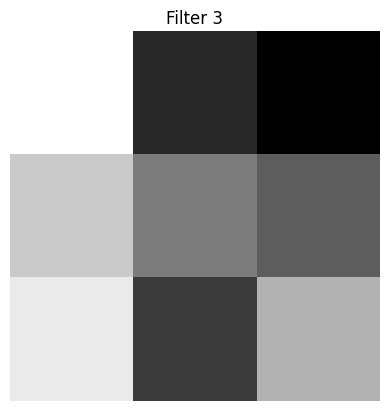

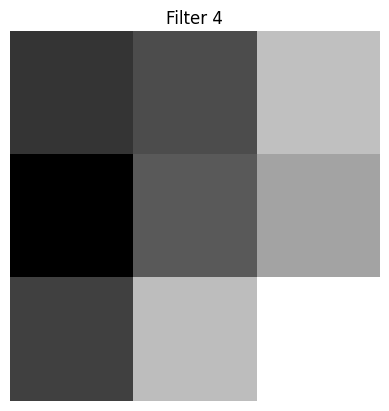

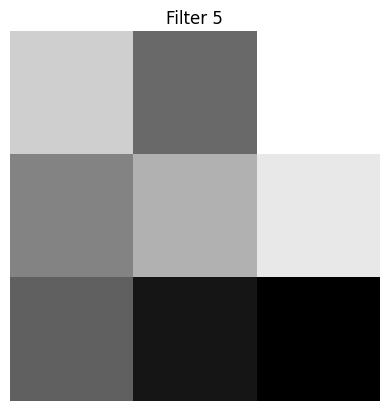

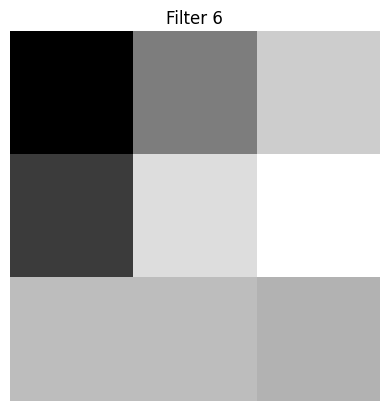

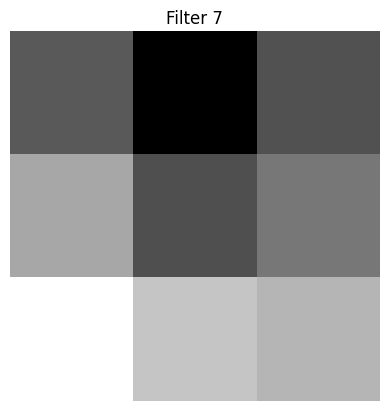

AttributeError: The layer sequential_4 has never been called and thus has no defined input.

In [5]:
# ============================================================
# 5.3 Visualize Filters and Feature Maps Learned by a CNN
# ============================================================

# Import required libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# Load and preprocess MNIST dataset
# ------------------------------------------------------------
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0

print("Training samples:", X_train.shape)
print("Testing samples:", X_test.shape)

# ------------------------------------------------------------
# Build CNN model
# ------------------------------------------------------------
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# ------------------------------------------------------------
# Compile model
# ------------------------------------------------------------
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# ------------------------------------------------------------
# Train the model
# ------------------------------------------------------------
print("\nTraining model...")
model.fit(X_train, y_train, epochs=3, batch_size=32)

# ------------------------------------------------------------
# Evaluate model
# ------------------------------------------------------------
test_loss, test_acc = model.evaluate(X_test, y_test)
print("\nTest accuracy:", test_acc)

print("\n====================================\n")

# ============================================================
# VISUALIZE LEARNED FILTERS (FIRST CONVOLUTION LAYER)
# ============================================================

print("Visualizing filters from first Conv layer...")

filters, biases = model.layers[0].get_weights()

# Normalize filter values to [0,1] for visualization
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

num_filters = 8  # visualize first 8 filters

for i in range(num_filters):
    filter_img = filters[:, :, 0, i]
    plt.imshow(filter_img, cmap='gray')
    plt.title(f"Filter {i}")
    plt.axis('off')
    plt.show()

# ============================================================
# VISUALIZE FEATURE MAPS (ACTIVATIONS)
# ============================================================

# Choose a test image
img = X_test[7]
img_input = np.expand_dims(img, axis=0)

# Create a model that outputs activations
layer_outputs = [layer.output for layer in model.layers[:2]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

print("Generating feature maps...")
activations = activation_model.predict(img_input)

first_layer_activation = activations[0]

num_maps = 8  # visualize first 8 feature maps

for i in range(num_maps):
    plt.imshow(first_layer_activation[0, :, :, i], cmap='viridis')
    plt.title(f"Feature Map {i}")
    plt.axis('off')
    plt.show()

# ============================================================
# Show original image
# ============================================================

plt.imshow(img.squeeze(), cmap='gray')
plt.title("Original Input Image")
plt.axis('off')
plt.show()


# WEEK 6

In [ ]:
# Import necessary libraries 6.1
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# ------------------------------------
# Example input feature map
# ------------------------------------
input_layer = layers.Input(shape=(28, 28, 1))

# Convolution layer
x = layers.Conv2D(32, (3, 3), activation='relu')(input_layer)

# Max Pooling layer
max_pool = layers.MaxPooling2D(pool_size=(3, 3), strides=2)(x)

# Average Pooling layer
avg_pool = layers.AveragePooling2D(pool_size=(4, 4), strides=2)(x)

# Create models
model_max = models.Model(inputs=input_layer, outputs=max_pool)
model_avg = models.Model(inputs=input_layer, outputs=avg_pool)

# ------------------------------------
# Create a dummy test image (28x28)
# ------------------------------------
sample = np.random.rand(1, 28, 28, 1)

# Compute pooled outputs
max_output = model_max.predict(sample)
avg_output = model_avg.predict(sample)

# Display output shapes
print("Max Pooling Output Shape:", max_output.shape)
print("Average Pooling Output Shape:", avg_output.shape)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
Max Pooling Output Shape: (1, 12, 12, 32)
Average Pooling Output Shape: (1, 12, 12, 32)


In [ ]:
#Residual block without dropout 6.2
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Input, Add, Dropout, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Residual Block with Dropout
def residual_block(x, filters=64, kernel_size=3, dropout_rate=0.25):
    skip = x

    x = Conv2D(filters, kernel_size, padding='same', activation='relu')(x)
    x = Dropout(dropout_rate)(x)   # Dropout applied
    x = Conv2D(filters, kernel_size, padding='same')(x)

    x = Add()([skip, x])
    return x


In [ ]:
#Super-Resolution CNN Model with Dropout
def build_sr_model(input_shape=(64, 64, 3), num_residual_blocks=8, dropout_rate=0.25):
    inp = Input(shape=input_shape)

    # Shallow feature extraction
    x = Conv2D(64, 3, padding='same', activation='relu')(inp)
    skip_connection = x

    # Residual blocks
    for _ in range(num_residual_blocks):
        x = residual_block(x, filters=64, dropout_rate=dropout_rate)

    # Feature fusion
    x = Add()([x, skip_connection])

    # Upsampling
    x = UpSampling2D(size=(2, 2))(x)
    x = Conv2D(64, 3, padding='same', activation='relu')(x)

    # Reconstruction
    out = Conv2D(3, 3, padding='same', activation='sigmoid')(x)

    model = Model(inputs=inp, outputs=out)
    return model


In [ ]:
#Compile the Model
model = build_sr_model(
    input_shape=(64, 64, 3),
    num_residual_blocks=8,
    dropout_rate=0.25
)

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='mse',
    metrics=['mae']
)

model.summary()


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 64, 64,    │      1,792 │ input_layer_2[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 64, 64,    │     36,928 │ conv2d_2[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 64, 64,    │          0 │ conv2d_3[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │     36,928 │ dropout[0][0]     │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 64, 64,    │          0 │ conv2d_2[0][0],   │
│                     │ 64)               │            │ conv2d_4[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 64, 64,    │     36,928 │ add[0][0]         │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 64, 64,    │          0 │ conv2d_5[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 64, 64,    │     36,928 │ dropout_1[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 64, 64,    │          0 │ add[0][0],        │
│                     │ 64)               │            │ conv2d_6[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 64, 64,    │     36,928 │ add_1[0][0]       │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 64, 64,    │          0 │ conv2d_7[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 64, 64,    │     36,928 │ dropout_2[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 64, 64,    │          0 │ add_1[0][0],      │
│                     │ 64)               │            │ conv2d_8[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 64, 64,    │     36,928 │ add_2[0][0]       │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 64, 64,    │          0 │ conv2d_9[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 64, 64,    │     36,928 │ dropout_3[0][0] 

 Total params: 631,299 (2.41 MB)

 Trainable params: 631,299 (2.41 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Training
import numpy as np

# Dummy training data
Xtrain = np.random.rand(100, 64, 64, 3)
Ytrain = np.random.rand(100, 128, 128, 3)

history = model.fit(
    Xtrain,
    Ytrain,
    batch_size=8,
    epochs=6,
    validation_split=0.1
)


Epoch 1/6
12/12 ━━━━━━━━━━━━━━━━━━━━ 53s 4s/step - loss: 0.0837 - mae: 0.2503 - val_loss: 0.0834 - val_mae: 0.2501
Epoch 2/6
12/12 ━━━━━━━━━━━━━━━━━━━━ 51s 4s/step - loss: 0.0835 - mae: 0.2501 - val_loss: 0.0834 - val_mae: 0.2501
Epoch 3/6
12/12 ━━━━━━━━━━━━━━━━━━━━ 51s 4s/step - loss: 0.0834 - mae: 0.2501 - val_loss: 0.0834 - val_mae: 0.2501
Epoch 4/6
12/12 ━━━━━━━━━━━━━━━━━━━━ 51s 4s/step - loss: 0.0833 - mae: 0.2500 - val_loss: 0.0834 - val_mae: 0.2501
Epoch 5/6
12/12 ━━━━━━━━━━━━━━━━━━━━ 52s 4s/step - loss: 0.0834 - mae: 0.2500 - val_loss: 0.0834 - val_mae: 0.2501
Epoch 6/6
12/12 ━━━━━━━━━━━━━━━━━━━━ 51s 4s/step - loss: 0.0833 - mae: 0.2500 - val_loss: 0.0834 - val_mae: 0.2501


In [ ]:
#6.3
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# -------------------------------
# Model A – Without Dropout
# -------------------------------
model_no_dropout = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model_no_dropout.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# -------------------------------
# Model B – With Dropout
# -------------------------------
model_dropout = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

model_dropout.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# -------------------------------
# Train both models
# -------------------------------
history_no_dropout = model_no_dropout.fit(
    x_train, y_train,
    epochs=6,
    batch_size=128,
    validation_split=0.1
)

history_dropout = model_dropout.fit(
    x_train, y_train,
    epochs=6,
    batch_size=128,
    validation_split=0.1
)

# -------------------------------
# Evaluate on test data
# -------------------------------
test_loss_no_dropout, test_acc_no_dropout = model_no_dropout.evaluate(x_test, y_test)
test_loss_dropout, test_acc_dropout = model_dropout.evaluate(x_test, y_test)

print("Test accuracy without dropout:", test_acc_no_dropout)
print("Test accuracy with dropout:", test_acc_dropout)


Epoch 1/6
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.8532 - loss: 0.5208 - val_accuracy: 0.9658 - val_loss: 0.1175
Epoch 2/6
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9639 - loss: 0.1195 - val_accuracy: 0.9740 - val_loss: 0.0911
Epoch 3/6
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9790 - loss: 0.0707 - val_accuracy: 0.9767 - val_loss: 0.0813
Epoch 4/6
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9839 - loss: 0.0508 - val_accuracy: 0.9797 - val_loss: 0.0733
Epoch 5/6
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9886 - loss: 0.0379 - val_accuracy: 0.9803 - val_loss: 0.0698
Epoch 6/6
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9921 - loss: 0.0268 - val_accuracy: 0.9737 - val_loss: 0.0883
Epoch 1/6
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.7878 - loss: 0.6833 - val_accuracy: 0.9647 - val_loss: 0.1212
Epoch 2/6
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9452 - loss: 0.1887 - val_accuracy: 0.973